In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Preview dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# No missing values in Iris dataset, so no imputation required

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [4]:
# Initialize Decision Tree with Gini criterion
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

In [5]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
y_pred = dt_model.predict(X_test)

Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



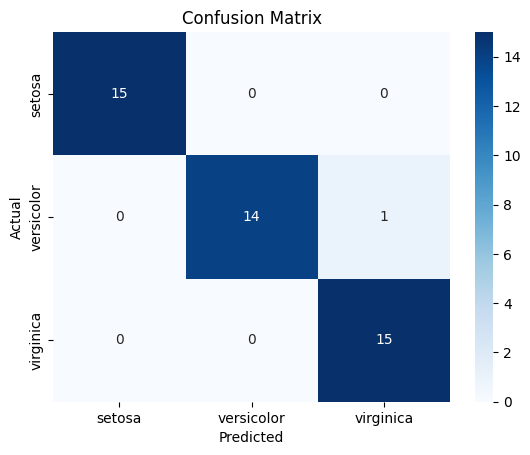

In [7]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

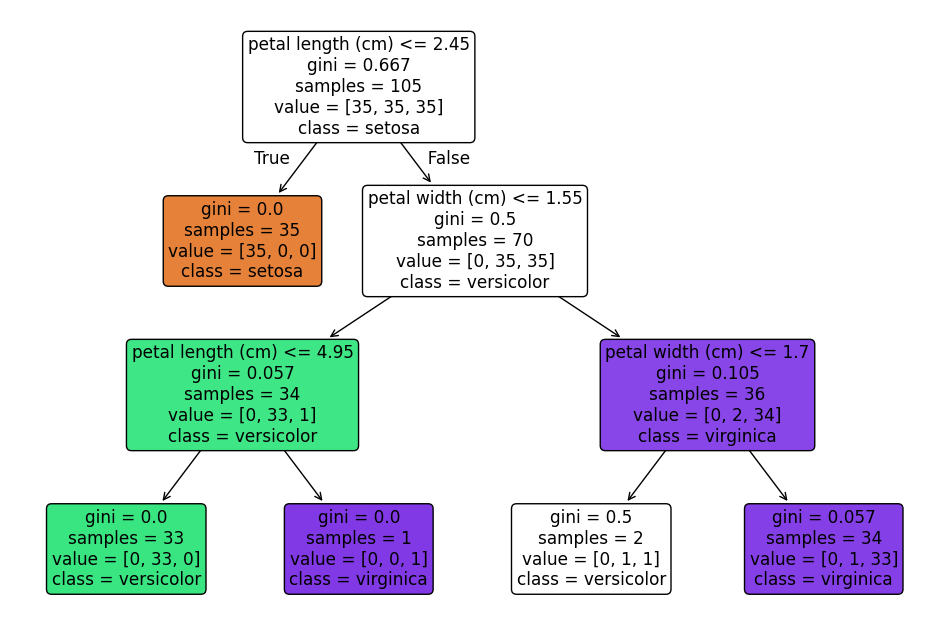

In [8]:
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

In [9]:
# Try different max_depth and criterion
settings = [
    {"criterion": "gini", "max_depth": 2},
    {"criterion": "gini", "max_depth": 4},
    {"criterion": "entropy", "max_depth": 3},
]

results = []

for s in settings:
    model = DecisionTreeClassifier(**s, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append({"criterion": s["criterion"], "max_depth": s["max_depth"], "accuracy": acc})

results_df = pd.DataFrame(results)
results_df

,criterion,max_depth,accuracy
0,gini,2,0.888889
1,gini,4,0.888889
2,entropy,3,0.933333


Summary of Experiments:
  criterion  max_depth  accuracy
0      gini          2  0.888889
1      gini          4  0.888889
2   entropy          3  0.933333


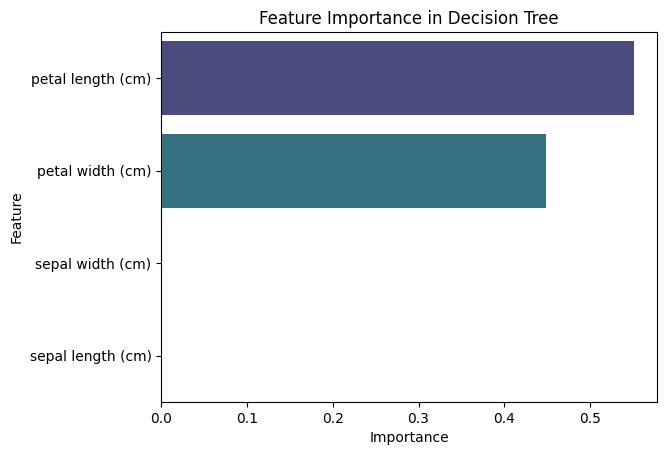

In [11]:
print("Summary of Experiments:")
print(results_df)

# Feature importance
importance = dt_model.feature_importances_
feature_imp = pd.DataFrame({"Feature": iris.feature_names, "Importance": importance})
feature_imp = feature_imp.sort_values(by="Importance", ascending=False)

# Plot feature importance
# Plot feature importance (fixed for seaborn v0.14+)
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_imp,
    hue="Feature",
    palette="viridis",
    legend=False
)
plt.title("Feature Importance in Decision Tree")
plt.show()
